Importing Libraries that we will need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve


print("Libraries imported successfully.")

Libraries imported successfully.


now , we import the Dataset

In [2]:
file_name = "insurance.csv"
df = pd.read_csv(file_name)

print("Dataset loaded successfully.")
df.head(10)

Dataset loaded successfully.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Some details about the Dataset

In [3]:
print("Dataset shape (rows, columns):", df.shape)
print("\nColumns and types:")
print(df.info())

print("\nNo. of missing Values: ")
print(df.isnull().sum())

Dataset shape (rows, columns): (1338, 7)

Columns and types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

No. of missing Values: 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Understanding the HealthCare Insurance Dataset**

This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges:

* Age: The insured person's age.

* Sex: Gender (male or female) of the insured.

* BMI (Body Mass Index): A measure of body fat based on height and weight.

* Children: The number of dependents covered.

* Smoker: Whether the insured is a smoker (yes or no).

* Region: The geographic area of coverage.

* Charges: The medical insurance costs incurred by the insured person. =>  __this is our target (y)__


Our goal is to predict __charges__ using the other columns as __input features__.

Define features (X) and target (y)

In [4]:
x = df.drop('charges', axis=1)
y = df['charges']

In [5]:
print(x)
print(y)
print("\nx shape (samples, features):", x.shape)
print("\ny shape (samples,):", y.shape)

      age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.770         1     no  southeast
2      28    male  33.000         3     no  southeast
3      33    male  22.705         0     no  northwest
4      32    male  28.880         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970         3     no  northwest
1334   18  female  31.920         0     no  northeast
1335   18  female  36.850         0     no  southeast
1336   21  female  25.800         0     no  southwest
1337   61  female  29.070         0    yes  northwest

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

x shape (samples, features): (1338, 6)

y shape (samples,): (1

Use ColumnTransformer to preprocess our Dataset

In [6]:
#Define Column Types for Preprocessing ---
numerical_cols = ['age', 'bmi', 'children']
nominal_categorical_cols = ['region']
binary_categorical_cols = ['sex', 'smoker']

#Create Preprocessing Pipeline (ColumnTransformer) ---

# The OrdinalEncoder will convert 'male'/'female' to 0/1, and 'yes'/'no' to 0/1.
ct = ColumnTransformer(
    transformers=[
        # Scaling numerical features (CRUCIAL for KNN)
        ('scaler', StandardScaler(), numerical_cols),

        # One-Hot Encoding for region (Nominal Categorical)
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_categorical_cols),

        # Ordinal Encoding for sex and smoker (Binary Categorical)
        # Assuming the order does not matter for binary classes
        ('ordinal', OrdinalEncoder(), binary_categorical_cols)
    ],
    remainder='passthrough',  # Keep any other columns if they exist (though we've defined all)
    verbose_feature_names_out=False
).set_output(transform='pandas') #ensures that the final output of the entire transformation process is a Pandas DataFrame
                                 #instead of a raw NumPy array

Splitting the Dataset to Trainset and Testset and Apply the transformations to them

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print("Training samples:", x_train.shape[0])
print("Testing samples :", x_test.shape[0])

x_train_processed = ct.fit_transform(x_train)
x_test_processed = ct.transform(x_test)

Training samples: 1070
Testing samples : 268


**Model 1: Linear Regression**

Fit the Train set in the Linear Regression model

In [8]:
lr_model = LinearRegression()
lr_model.fit(x_train_processed, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Predict the Charges by LR Model:

In [9]:
y_pred_lr = lr_model.predict(x_test_processed)

comparison_lr = pd.DataFrame({
'Actual Charges': y_test[:10],
'Predicted Charges': y_pred_lr[:10]
})
print("First 10 Actual vs Predicted Charges values(LR):")
print(comparison_lr)

First 10 Actual vs Predicted Charges values(LR):
      Actual Charges  Predicted Charges
578       9724.53000       11169.927119
610       8547.69130        9486.709085
569      45702.02235       38181.123053
1034     12950.07120       16266.313289
198       9644.25250        6914.648007
981       4500.33925        3963.484876
31        2198.18985        1579.396913
1256     11436.73815       14385.256569
1219      7537.16390        9012.579696
1320      5425.02335        7508.460677


Evaluate the LR model by MSE

In [10]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f"MSE (Linear Regression): ", mse_lr)
print("RMSE (Linear Regression): ", rmse_lr)

MSE (Linear Regression):  31827950.229523834
RMSE (Linear Regression):  5641.62655885019


Plotting LR Model:

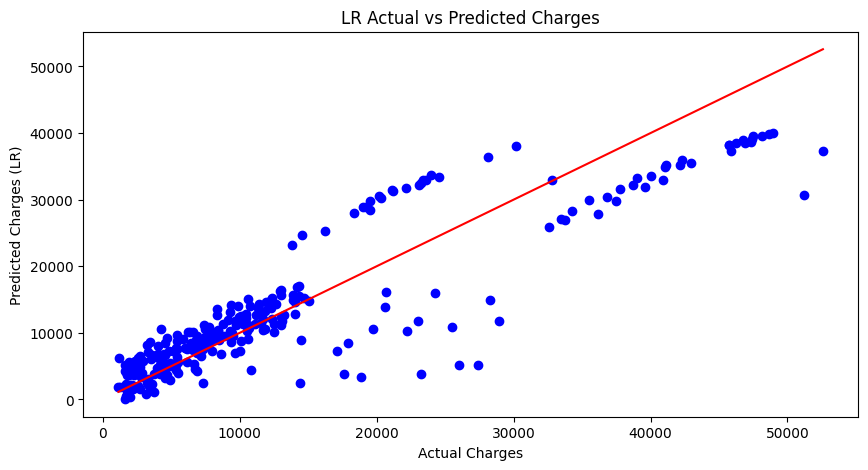

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()] , color='red')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges (LR)")
plt.title("LR Actual vs Predicted Charges")
plt.show()

**Convert Regression to Binary Classification**

We use the median of the actual test data as the cutoff(threshold) for "High" vs "Low"

In [12]:
threshold = y_test.median() 

# Convert actual values to binary (1 if > threshold, else 0)
y_test_binary = (y_test > threshold).astype(int)

# Convert predicted values to binary
y_pred_binary = (y_pred_lr > threshold).astype(int)

print(f"Threshold used: ${threshold:,.2f}")

Threshold used: $9,195.22


Calculating Accuracy dor LR Model:

In [16]:
accuracy_lr = accuracy_score(y_test_binary, y_pred_binary)
print(f"Derived Classification Accuracy: {accuracy_lr:.2%}")

Derived Classification Accuracy: 85.07%


Confusion Matrix for LR Model:

<Figure size 600x600 with 0 Axes>

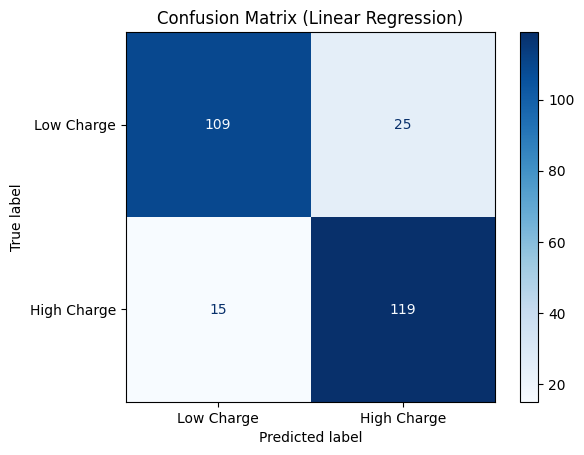

In [19]:
cm = confusion_matrix(y_test_binary, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Charge', 'High Charge'])

plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Linear Regression)")
plt.show()

ROC Curve for LR Model:

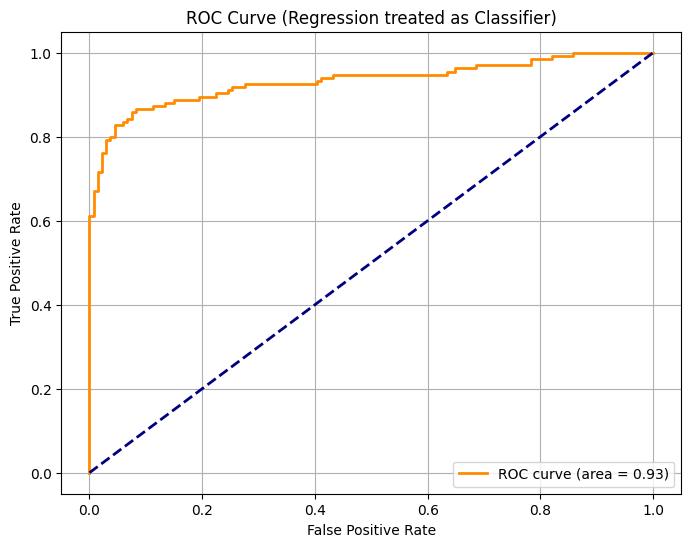

In [20]:
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Regression treated as Classifier)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Model 2: KNN Regression**

Fit the Train set in the KNN Regression model 

In [21]:
# Note: Feature Scaling (StandardScaler) was essential and is already applied via the ColumnTransformer!
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train_processed, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Predict the Charges by KNN Regression Model:

In [22]:
y_pred_knn = knn_model.predict(x_test_processed)

comparison_knn = pd.DataFrame({
'Actual Charges': y_test[:10],
'Predicted Charges': y_pred_knn[:10]
})
print("First 10 Actual vs Predicted Charges values(KNN):")
print(comparison_knn)

First 10 Actual vs Predicted Charges values(KNN):
      Actual Charges  Predicted Charges
578       9724.53000        8433.604400
610       8547.69130        7948.160220
569      45702.02235       29049.586058
1034     12950.07120       11382.175780
198       9644.25250        9912.425780
981       4500.33925        3668.906850
31        2198.18985        2588.958100
1256     11436.73815       16939.455808
1219      7537.16390        9434.740730
1320      5425.02335       10491.928940


Evaluate the KNN model by MSE

In [23]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f"MSE (Linear Regression): ", mse_knn)
print("RMSE (Linear Regression): ", rmse_knn)

MSE (Linear Regression):  47653978.311819136
RMSE (Linear Regression):  6903.186098593832


Plotting KNN Regression Model:

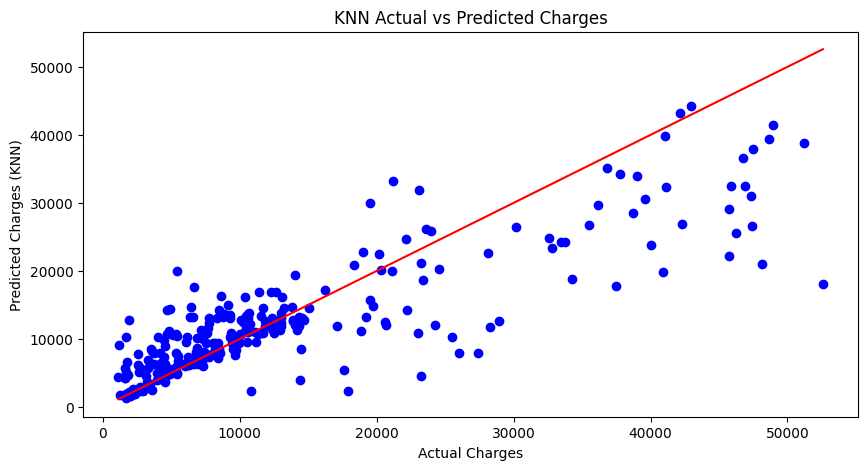

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()] , color='red')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges (KNN)")
plt.title("KNN Actual vs Predicted Charges")
plt.show()

**Convert Regression to Binary Classification**

We use the median of the actual test data as the cutoff(threshold) for "High" vs "Low"

In [25]:
threshold = y_test.median() 

# Convert actual values to binary (1 if > threshold, else 0)
y_test_binary = (y_test > threshold).astype(int)

# Convert KNN predicted values to binary
y_pred_binary_knn = (y_pred_knn > threshold).astype(int)

print(f"Threshold used: ${threshold:,.2f}")

Threshold used: $9,195.22


Calculating Accuracy dor KNN Model:

In [26]:
accuracy_knn = accuracy_score(y_test_binary, y_pred_binary_knn)
print(f"Derived Classification Accuracy (KNN): {accuracy_knn:.2%}")

Derived Classification Accuracy (KNN): 82.46%


Confusion Matrix for KNN Model:

<Figure size 600x600 with 0 Axes>

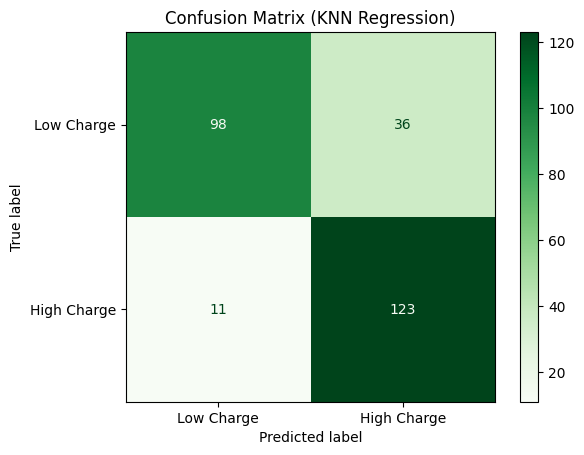

In [28]:
cm_knn = confusion_matrix(y_test_binary, y_pred_binary_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Low Charge', 'High Charge'])

plt.figure(figsize=(6, 6))
disp_knn.plot(cmap=plt.cm.Greens)  # Changed color to Green to distinguish from Linear Regression
plt.title("Confusion Matrix (KNN Regression)")
plt.show()

Roc Curve for KNN Model:

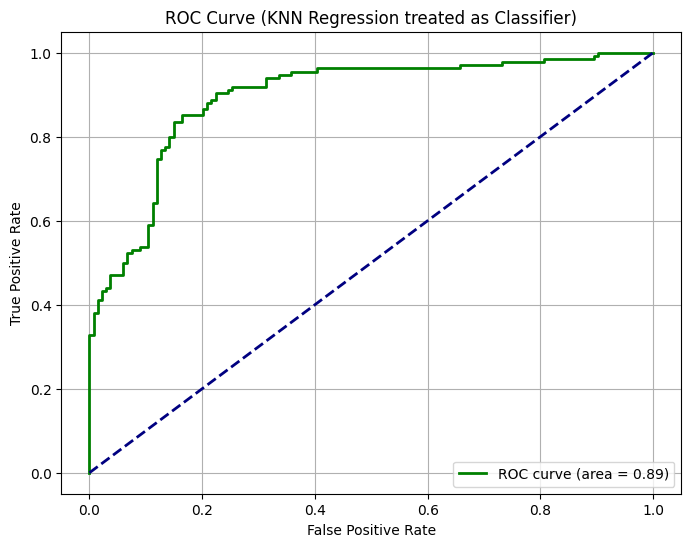

In [29]:
# For ROC, we use the continuous regression predictions (y_pred_knn) as the "score"
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_binary, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN Regression treated as Classifier)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()